In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Load dataset from .csv file

In [17]:
dataset = pd.read_csv("data.csv", encoding='latin-1')

Process data to remove string columns and rows with NaN elements

In [18]:
print(dataset.shape)
# dataset.plot()
dataset = dataset.drop(columns = ['Museum', 'Species', 'Subspecies', 'Clade', 'Sex', 'Elevation', 'Species.1', 'Museum.1', '[H]a', 'Preparation', 'Unnamed: 76','Country', 'State/Province', 'Region', 'Locality', 'Species.2', 'Museum.2', 'Specimen_Number.1',  'Isotope_Samp_ID'], axis = 1)
dataset = dataset.dropna()
# dataset.plot()
dataset.columns

(439, 80)


Index(['Specimen _Number', 'Body Mass (g)', 'Body _Length _(mm)',
       'Head _Length _(mm)', 'Bill Length (mm)', 'Bill Width1 (mm)',
       'Bill Width2 (mm)', 'Bill Width3 (mm)', 'Bill Depth1 (mm)',
       'Bill Depth2 (mm)', 'Bill Depth3 (mm)',
       'Proximal Bill Cross-Sectional_ Area (mm2)',
       'Mid-Length Bill Cross-Sectional Area (mm2)',
       'Distal Bill Cross-Sectional Area (mm2)', 'Wing Length (mm)',
       'Primary 1 (mm)', 'Primary 2 (mm)', 'Primary 3 (mm)', 'Primary 4 (mm)',
       'Primary 5 (mm)', 'Primary 6 (mm)', 'Primary 7 (mm)', 'Primary 8 (mm)',
       'Primary 9 (mm)', 'Width of Primary 1', 'Width of Primary 9',
       'Tibiotarsus Width (mm)', 'Tarsometatarsus Length (mm)',
       'Tarsometatarsus Width (mm)', 'Digit 1 (mm)', 'Digit 2 (mm)',
       'Digit 3 (mm)', 'Digit 4 (mm)', 'Ungual 1 (mm)', 'Ungual 2 (mm)',
       'Ungual 3 (mm)', 'Ungual 4 (mm)', 'Central rectrix (mm)',
       'Lateral Retrices', 'Isometric Size Index', 'Wing Pointedness Index',
  

In [19]:
lol = dataset['Specimen _Number']
pd.plotting.scatter_matrix(lol)

AttributeError: 'Series' object has no attribute 'columns'

In [20]:
import plotly.express as px

features = dataset.columns[:4]
print(features)
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
    color="color"
)
fig.update_traces(diagonal_visible=False)
fig.show()

Index(['Specimen _Number', 'Body Mass (g)', 'Body _Length _(mm)',
       'Head _Length _(mm)'],
      dtype='object')


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Specimen _Number', 'Body Mass (g)', 'Body _Length _(mm)', 'Head _Length _(mm)', 'Bill Length (mm)', 'Bill Width1 (mm)', 'Bill Width2 (mm)', 'Bill Width3 (mm)', 'Bill Depth1 (mm)', 'Bill Depth2 (mm)', 'Bill Depth3 (mm)', 'Proximal Bill Cross-Sectional_ Area (mm2)', 'Mid-Length Bill Cross-Sectional Area (mm2)', 'Distal Bill Cross-Sectional Area (mm2)', 'Wing Length (mm)', 'Primary 1 (mm)', 'Primary 2 (mm)', 'Primary 3 (mm)', 'Primary 4 (mm)', 'Primary 5 (mm)', 'Primary 6 (mm)', 'Primary 7 (mm)', 'Primary 8 (mm)', 'Primary 9 (mm)', 'Width of Primary 1', 'Width of Primary 9', 'Tibiotarsus Width (mm)', 'Tarsometatarsus Length (mm)', 'Tarsometatarsus Width (mm)', 'Digit 1 (mm)', 'Digit 2 (mm)', 'Digit 3 (mm)', 'Digit 4 (mm)', 'Ungual 1 (mm)', 'Ungual 2 (mm)', 'Ungual 3 (mm)', 'Ungual 4 (mm)', 'Central rectrix (mm)', 'Lateral Retrices', 'Isometric Size Index', 'Wing Pointedness Index', 'Wing Convexity Index', 'Latitute (o South)', 'Longitude (o West)', 'Elevation1', 'Prin1 2', 'Prin2 2', 'Prin3 2', 'Prin4 2', 'Prin5 2', 'Specimen_Number', 'D15N', 'D13C', 'Prct_Nitrogen', 'Prct_Carbon', 'C_N_Ratio', ' ?18O', 'dDa', 'dDb', '[H]b', 'Mean_dD'] but received: color

Standartize values for correct work of algorithm

In [22]:
dataset = StandardScaler().fit_transform(dataset)

In [23]:
print(dataset.shape)

(34, 61)


Use PCA from sklearn.decomposition with 95% information contetnt from original data

In [24]:
pca = PCA(.95)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents)

print(principalDf)

           0         1         2         3         4         5         6   \
0   -2.884737 -5.420786 -1.812778  0.659872 -0.560784  4.158020  0.537171   
1   -4.938940 -0.830229  0.744512  1.472647 -1.476462  2.678150  3.007783   
2    9.109179 -4.879437  3.059885  3.614592 -2.862268  1.148315 -2.324977   
3    6.882825 -4.447306 -0.327545  1.561769 -1.491569  0.590715 -1.485366   
4   13.501840 -2.804661  6.907520 -2.800247  1.350203  0.621564  3.874344   
5   -3.597194 -2.721186  1.015443 -0.950109  0.087442  0.019462 -1.531929   
6   -0.734525 -0.203328  2.898714 -1.206237  1.218339  1.005960 -1.996318   
7   -4.419006 -3.079991  0.801162 -1.350153  0.680229 -0.966912 -0.841159   
8   -3.479551 -1.475067  2.453403 -3.322970  0.380364 -0.069065 -0.230094   
9   -4.878196 -2.144782  1.002886 -2.062284  0.935610 -0.092117 -0.662447   
10  -4.181115 -1.985395  1.040625 -1.170530 -1.072628  0.374472 -1.200028   
11  -4.003654 -1.656785  0.730565 -0.504618  1.164007 -0.147113  0.341217   

<AxesSubplot:>

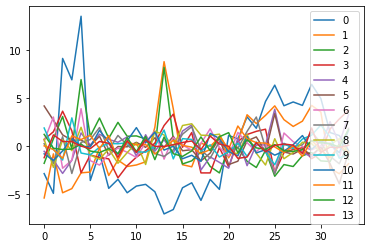

In [25]:
principalDf.plot()

In [28]:
features = principalDf.columns[:6]
print(features)
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
)
fig.update_traces(diagonal_visible=False)
fig.show()

RangeIndex(start=0, stop=6, step=1)


Percentage of variance explained by each of the selected components

In [15]:
print(pca.explained_variance_ratio_)

[0.41648744 0.15806505 0.09690811 0.06142774 0.04005567 0.03619821
 0.03292003 0.02698861 0.02377035 0.0192849  0.01461563 0.00989308
 0.00948377 0.00769625]
